In [2]:
#data set

#A

a = [0,0,1,1,0,0,
     0,1,0,0,1,0,
     1,1,1,1,1,1,
     1,0,0,0,0,1,
     1,0,0,0,0,1]

#B

b = [0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0]

#C

c = [0,1,1,1,1,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,1,1,1,0]

In [3]:
#creating labels 
y = [[1,0,0],
     [0,1,0],
     [0,0,1]]

In [4]:
import numpy as np
import matplotlib.pyplot as plt

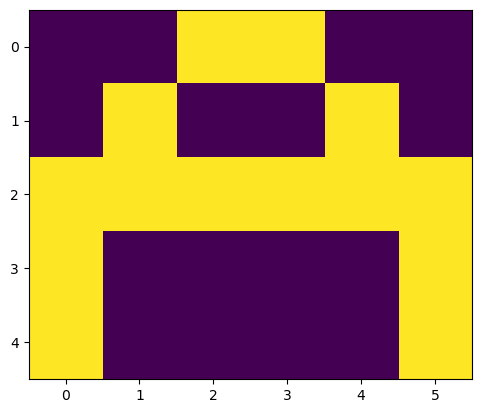

In [5]:
# visualise the data
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [6]:
#convert data and labels into numpy array
x = [np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]

y = np.array(y)

print(x, "\n\n",y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [7]:
#input (1,30)
#hidden (1,5)
#output (3,3)

In [39]:
#activation function 

def sigmoid(x):
      return (1/(1+np.exp(-x)))

In [9]:
#creating feed forward  NN
def f_forward(x,w1,w2):
    #hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return (a2)

In [19]:
# initialize the weights

def generate_wt(x,y):
    l = []
    for i in range(x*y):
        l.append(np.random.randn())
    return (np.array(l).reshape(x,y))
        

In [65]:
def loss(out,Y):
        s = (np.square(out-Y))
        s= np.sum((s)/len(y))
        return(s)

In [69]:
#back propagation
def back_propogation(x,y,w1,w2,alpha):

    #hidden layer
    z1 =x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2 = (a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),(np.multiply(a1, 1-a1)))

    #gradient
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))

    return(w1,w2)

In [73]:
def train(x, y, w1, w2, alpha=0.01, epoch=10):
    acc_list = []
    loss_list = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append(loss(out, y[i]))  # Fixed append call
            w1, w2 = back_propogation(x[i], y[i], w1, w2, alpha)  # Fixed indexing

        print("Epochs:", j + 1, "acc:", (1 - (sum(l) / len(x))) * 100)
        acc_list.append((1 - (sum(l) / len(x))) * 100)
        loss_list.append(sum(l) / len(x))

    return acc_list, loss_list, w1, w2


In [92]:
def predict (x,w1,w2):
    Out = f_forward(x,w1,w2)
    maxm = 0
    k=0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k==0):
            print("Image is of Letter A")
    elif(k==1):
             print("Image is of Letter B")
    else:
             print("Image is of Letter C")
              
    plt.imshow(x.reshape(5,6))
    plt.show()

In [20]:
w1 = generate_wt(30,5)
w2 = generate_wt(5,3)
print(w1 ,"\n", w2)

[[ 1.23741391 -0.08986849 -0.02371494 -1.39282896 -1.60716139]
 [ 0.1165082   0.0213183  -0.61928976 -0.71967721  0.97417132]
 [-0.8419598  -0.84255094 -0.83791811  0.65780444  1.13146404]
 [ 0.79428834  1.09483357  0.03645609  0.62270188 -1.25380838]
 [ 0.31322944  1.27920293 -0.79806254  0.50483482  0.70096334]
 [ 0.42586547  0.64458374  2.26812768 -0.43006518 -1.52117347]
 [-0.09611224  0.05377847  1.27855404 -0.99655882 -0.26950344]
 [ 0.80791813 -0.2171991  -0.36750007 -1.1631696   0.32487609]
 [ 0.3878327  -0.46854584  1.20424915 -0.11147111 -0.6890785 ]
 [-2.66072193  1.21092747  0.49561942 -2.24136305 -0.26613258]
 [ 0.09887382 -1.28402919 -1.84218557  0.16985564 -1.11840211]
 [ 0.0147466  -1.84146241 -0.74763255  0.53717727 -0.365468  ]
 [-1.10286298 -0.87154116 -0.81003344  0.47102019  1.03523835]
 [-0.28511585 -2.02943606  0.29290081  1.17378    -0.0175121 ]
 [ 0.61115738  0.28321599  0.52944769 -2.30287674 -0.96750786]
 [-0.6875547   2.80355679  0.71039801 -1.18331749 -0.87

In [74]:
acc, loss, w1, w2 = train(x , y  ,w1, w2, 0.1, 100)

Epochs: 1 acc: 66.62426675213662
Epochs: 2 acc: 69.35443651179507
Epochs: 3 acc: 71.73991398617106
Epochs: 4 acc: 73.78519641265325
Epochs: 5 acc: 75.50108286642069
Epochs: 6 acc: 76.92899705993011
Epochs: 7 acc: 78.12422185208227
Epochs: 8 acc: 79.140008787897
Epochs: 9 acc: 80.02098485622388
Epochs: 10 acc: 80.80227003020904
Epochs: 11 acc: 81.51073861244069
Epochs: 12 acc: 82.16668711530079
Epochs: 13 acc: 82.78526914700251
Epochs: 14 acc: 83.3775329536719
Epochs: 15 acc: 83.95109260767187
Epochs: 16 acc: 84.51056510494593
Epochs: 17 acc: 85.0579669654263
Epochs: 18 acc: 85.59325565521578
Epochs: 19 acc: 86.11508057346902
Epochs: 20 acc: 86.62161931383339
Epochs: 21 acc: 87.11126393023491
Epochs: 22 acc: 87.58299013853926
Epochs: 23 acc: 88.03641475576707
Epochs: 24 acc: 88.47166734120708
Epochs: 25 acc: 88.88920973733076
Epochs: 26 acc: 89.28968164709794
Epochs: 27 acc: 89.67379573684237
Epochs: 28 acc: 90.04227665935747
Epochs: 29 acc: 90.39583014093074
Epochs: 30 acc: 90.73512977

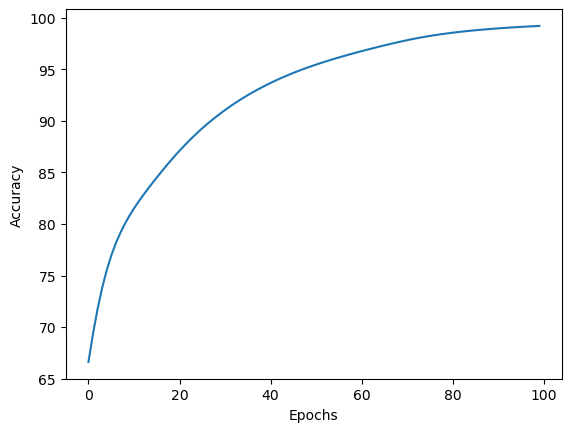

In [75]:
import matplotlib.pyplot as plt1

#plotting acccuracy

plt1.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs")
plt1.show()

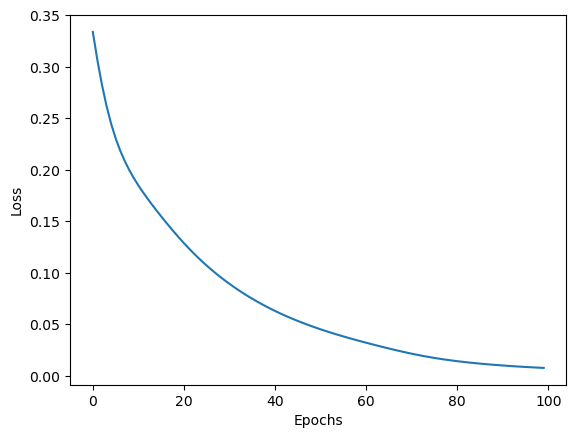

In [77]:
#plot loss

plt1.plot(loss)
plt.ylabel('Loss')
plt1.xlabel("Epochs")
plt.show()

In [78]:
print(w1 ,"\n", w2)

[[ 1.23741391e+00 -8.98684868e-02 -2.37149436e-02 -1.39282896e+00
  -1.60716139e+00]
 [ 2.01067680e-01 -2.37235095e-01 -3.57761671e-01 -7.82832864e-01
   1.12206687e+00]
 [-1.14331001e+00 -1.07335028e+00 -5.90650713e-01  1.05459064e+00
   1.30461555e+00]
 [ 4.92938127e-01  8.64034231e-01  2.83723496e-01  1.01948808e+00
  -1.08065686e+00]
 [ 3.97788922e-01  1.02064953e+00 -5.36534449e-01  4.41679164e-01
   8.48858892e-01]
 [ 4.25865472e-01  6.44583742e-01  2.26812768e+00 -4.30065179e-01
  -1.52117347e+00]
 [-9.61122422e-02  5.37784715e-02  1.27855404e+00 -9.96558816e-01
  -2.69503444e-01]
 [ 5.06567912e-01 -4.47998434e-01 -1.20232672e-01 -7.66383405e-01
   4.98027603e-01]
 [ 3.87832699e-01 -4.68545843e-01  1.20424915e+00 -1.11471111e-01
  -6.89078498e-01]
 [-2.66072193e+00  1.21092747e+00  4.95619425e-01 -2.24136305e+00
  -2.66132577e-01]
 [-2.63436486e-01 -3.21085258e-01 -2.20057582e+00  6.23583950e-01
  -1.68072329e+00]
 [ 1.47466033e-02 -1.84146241e+00 -7.47632554e-01  5.37177267e-01

Image is of Letter A


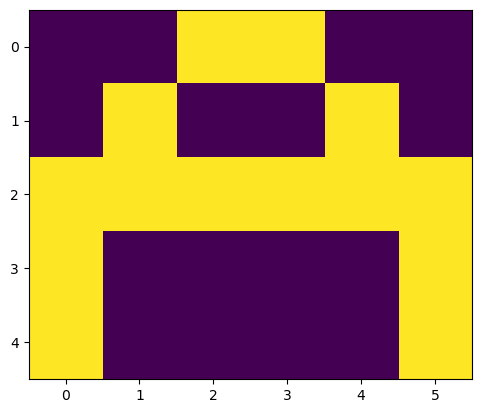

In [95]:
predict(x[0],w1,w2)

Image is of Letter B


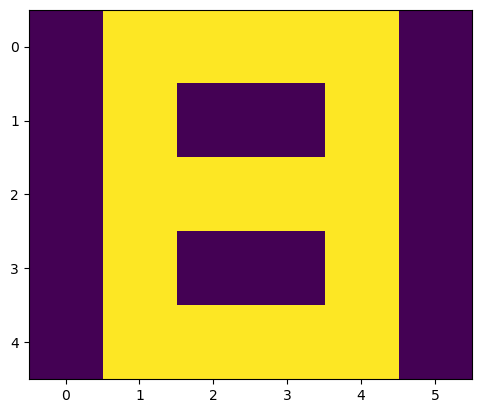

In [96]:
predict(x[1],w1,w2)

Image is of Letter C


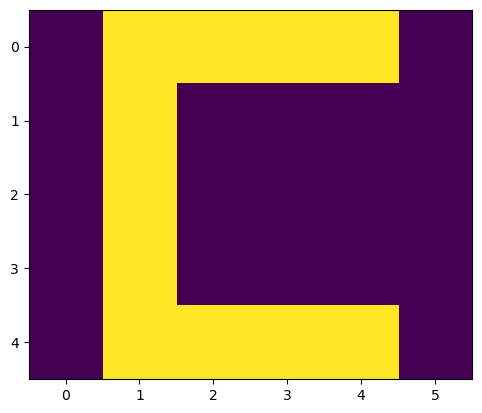

In [97]:
predict(x[2],w1,w2)